# Clone my driving behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

/home/mariosk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMAGE_SHAPE = (160, 320, 3)

## Load images and measurements

In [3]:
driving_log = pd.read_csv(
    './my-videos/driving_log.csv', 
    header=None,
    names=[
        'center_image', 'left_image', 'right_image', 
        'steering_angle', 'throttle', 'break', 'speed'])

In [4]:
%%time
images = np.stack(driving_log['center_image'].map(plt.imread), axis=0)

CPU times: user 3.56 s, sys: 324 ms, total: 3.89 s
Wall time: 4.33 s


In [5]:
measurements = driving_log['steering_angle']

## Define model

In [32]:
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=IMAGE_SHAPE),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

## Train model

/home/mariosk/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:1441: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  ret = ax.set_xlim(*args, **kwargs)


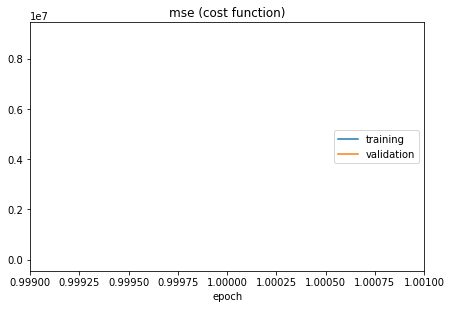

In [33]:
model.fit(
    images, 
    measurements, 
    epochs=1,
    callbacks=[PlotLossesKeras()],
    validation_split=0.2, 
    shuffle=True)

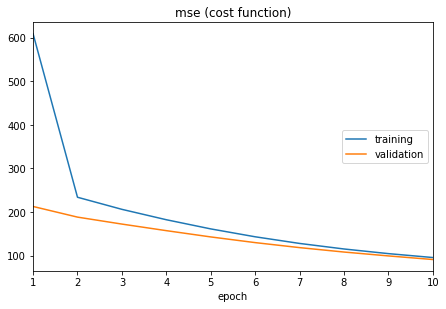

In [34]:
model.fit(
    images, 
    measurements, 
    epochs=10,
    callbacks=[PlotLossesKeras()],
    validation_split=0.2, 
    shuffle=True)

In [35]:
model.save('model.h5a')

In [36]:
import socketio

In [ ]:
socketio.So